In [1]:
# import things

import os
os.environ["OMP_NUM_THREADS"] = "8" 
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
# pwd = os.getcwd()
# os.chdir('/Users/slill/Code/EXP/build/pyEXP/')
# print(os.getcwd())
import time
import pyEXP
# os.chdir(pwd)

# os.chdir('/Users/slill/Documents/Projects/exp-extreme-MWLMC/extreme-mwlmc/analysis/')

print(os.getcwd())
print(pyEXP.util.getVersionInfo())

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

import seaborn as sns   

plt.style.use('my_latex_standard2')

sns.set_palette("Spectral", 6)

datadir = '/cosma8/data/dp309/dc-lill1/'
datadir_mssa = '/cosma8/data/dp309/dc-lill1/mssa/newG5/'

runtag = 'RunG5'
runtag2 = 'newG5'

/cosma/home/durham/dc-lill1/extreme-mwlmc/extreme-mwlmc/analysis
None

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%% This is EXP 7.7.99 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%% Repository URL | https://github.com/EXP-code/EXP                         %
%%%%% Current branch | main                                                    %
%%%%% Current commit | 922d165740d1e44f12447fa9f033d86c283076f2                %
%%%%% Compile time   | 2024-11-07 20:55:13 GMT                                 %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



In [2]:
virialradius=122.0
virialvelocity=119.
massscale = virialvelocity**2 * virialradius / 0.0000043009125  
timescale = virialradius/virialvelocity


In [3]:
# MW halo coefs
mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
mwhalo_keylst = mwhalo_coefs.makeKeys([])


# MW disc coefs
mwdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwdisk.{runtag}')
mwdisc_keylst = mwdisc_coefs.makeKeys([])

# LMC halo coefs
lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}')
lmchalo_coefs2 = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}')
lmchalo_keylst = lmchalo_coefs.makeKeys([])

# LMC disc coefs
lmcdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmc.{runtag2}')
# lmcdisc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmcdisk.{runtag}')
lmcdisc_keylst = lmcdisc_coefs.makeKeys([])


In [4]:
### MW halo
print("config MW halo")
mwhconfig = """
---
id: sphereSL
parameters :
  numr     : 2000
  rmin     : 0.00001
  rmax     : 2.0
  Lmax     : 6
  nmax     : 20
  rmapping : 0.0667
  modelname : Einasto_rs0.07_rhos24.913_alpha0.16_rtrunc20.txt
  cachename : EinastoR20
"""

mwhruntag = f'mwhalo.{runtag}'
mwhbasis = pyEXP.basis.Basis.factory(mwhconfig)


config MW halo
---- SLGridSph::ReadH5Cache: successfully read basis cache <EinastoR20>
Spherical::orthoTest: worst=0.000763606


In [5]:
### LMC halo
print("config LMC halo")
lmchconfig = """
---
id: sphereSL
parameters :
  numr     : 2000
  rmin     : 0.00001
  rmax     : 2.0
  Lmax     : 6
  nmax     : 20
  rmapping : 0.0667
  modelname : ./Einasto_rs0.035_rhos24.682_alpha0.16_rtrunc33.txt
  cachename : EinastoR33
"""

lmchruntag = f'lmchalo.{runtag}'
lmchbasis = pyEXP.basis.Basis.factory(lmchconfig)

config LMC halo
---- SLGridSph::ReadH5Cache: successfully read basis cache <EinastoR33>
Spherical::orthoTest: worst=0.00125842


In [6]:
fname = f'{datadir}/MWeofcachenew'
print(fname)

print(f'MWeofcachenew path works? {os.path.isfile(fname)}')

fname2 = f'{datadir}/LMCeofcachenew'
print(fname2)
print(f'LMCeofcachenew path works? {os.path.isfile(fname2)}')

/cosma8/data/dp309/dc-lill1//MWeofcachenew
MWeofcachenew path works? True
/cosma8/data/dp309/dc-lill1//LMCeofcachenew
LMCeofcachenew path works? True


In [7]:
### MW disc
print("config MW disc")

mwdconfig=f"""
id         : cylinder
parameters :
  acyl       : 0.029
  hcyl       : 0.004
  lmaxfid    : 72
  mmax       : 6
  nmaxfid    : 32
  nmax       : 20
  ncylodd    : 8
  ncylnx     : 512
  ncylny     : 256
  rcylmin    : 0.001
  rcylmax    : 100.0
  cachename  : {datadir}/MWeofcachenew
"""
disc_basis = pyEXP.basis.Basis.factory(mwdconfig)

config MW disc
---- EmpCylSL::ReadH5Cache: read </cosma8/data/dp309/dc-lill1//MWeofcachenew>
---- EmpCylSL::read_cache: table forwarded to all processes
Cylindrical::orthoTest: worst=0.000142087


In [8]:
### LMC disc
print("config LMC Disc")

lmcdconfig=f"""
id         : cylinder
parameters :
    acyl       : 0.014
    hcyl       : 0.003
    lmaxfid    : 72
    mmax       : 6
    nmaxfid    : 32
    nmax       : 20
    ncylodd    : 8
    ncylnx     : 256
    ncylny     : 128
    rcylmin    : 0.001
    rcylmax    : 200.0
    cachename  : {datadir}/LMCeofcachenew
"""


lmcdruntag = f'lmcdisk.{runtag}'
lmcdbasis = pyEXP.basis.Basis.factory(lmcdconfig)




config LMC Disc
---- EmpCylSL::ReadH5Cache: read </cosma8/data/dp309/dc-lill1//LMCeofcachenew>
---- EmpCylSL::read_cache: table forwarded to all processes
Cylindrical::orthoTest: worst=0.000251818


In [9]:
def read_orient(infile):
    O = np.genfromtxt(infile,skip_header=3)
    t = O[:,0]
    x = O[:,15]
    y = O[:,16]
    z = O[:,17]
    if "disk" in infile or "disc" in infile:
        xangle = O[:,6]
        yangle = O[:,7]
        zangle = O[:,8]
        phi = np.arctan2(yangle,xangle)
        theta = -np.arccos(zangle/np.sqrt(xangle**2 + yangle**2 + zangle**2))
        psi = 0.0
        return {
            't': t, 
            'x': x, 
            'y': y, 
            'z': z, 
            'xangle': xangle, 
            'yangle': yangle, 
            'zangle': zangle, 
            'phi': phi, 
            'theta': theta, 
            'psi': psi
        }
    else:
        return {'t': t, 'x': x, 'y': y, 'z': z}

mwhcenter = read_orient(f'{datadir}mwhalo.orient.{runtag}')
lmchcenter = read_orient(f'{datadir}lmchalo.orient.{runtag}')
mwdcenter = read_orient(f'{datadir}mwdisc.orient.{runtag}')
lmcdcenter = read_orient(f'{datadir}lmcdisc.orient.{runtag}')

Compare low order mssa outputs for different l
====


In [10]:
# # get proper times?
# size = 150./virialradius
# npix = 128

# times = mwhalo_coefs.Times()
# tref = 1.7
# times_phys = timescale * (np.array(times)-tref)

# pmin  = [0.0, -size,  -size]
# pmax  = [0.0, size, size]
# grid  = [ 0,  npix,  npix]

# # make MW fields (LMC fields are shifted by its center at each time step in the for loop)
# fields = pyEXP.field.FieldGenerator(times, pmin, pmax, grid)
# mwhsurfaces = fields.slices(mwhbasis, mwhalo_coefs)



In [11]:
# in the cell below, something weird is going on with the LMC reconstruction
# looking at this in more detail here
lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 

window = int(len(lmchalo_coefs.Times())/2)
npc = 100 # number of principal components; probably want more than 20; max number of PCs would be the window length

max_r_order = 8

flags ="""
---
totPow: true
# totVar: true
BDCSVD: true
...
"""

order = [1]
rad_mask = [np.where(np.array(lmchalo_coefs.makeKeys(order))[:,2]<max_r_order)]
mwh_subcoefs = np.array(mwhalo_coefs.makeKeys(order))[rad_mask].tolist()[0][0]
lmch_subcoefs = np.array(lmchalo_coefs.makeKeys(order))[rad_mask].tolist()[0][0]
config = {
    # "MW halo": (mwhalo_coefs, mwh_subcoefs, []),
    "LMC halo": (lmchalo_coefs, lmch_subcoefs, []),
        } 
startTime = time.time()
ssa = pyEXP.mssa.expMSSA(config, window, npc, flags)
ev = ssa.eigenvalues() # do the decomposition (expensive step)
pc = ssa.getPC() # also triggers the expensive step

ssa.reconstruct(order)
coefs = lmchalo_coefs 
coefs.zerodata() 
print(ssa.getReconstructed()['LMC halo'].Power())
print(lmchalo_coefs.Power())

---- Eigen is using 8 threads
shape U = 19320 x 806
shape Y = 806 x 19320
[[0.         0.00279726 0.         ... 0.         0.         0.        ]
 [0.         0.00280442 0.         ... 0.         0.         0.        ]
 [0.         0.00281206 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00476186 0.         ... 0.         0.         0.        ]
 [0.         0.00475406 0.         ... 0.         0.         0.        ]
 [0.         0.00474625 0.         ... 0.         0.         0.        ]]
[[0.         0.00279726 0.         ... 0.         0.         0.        ]
 [0.         0.00280442 0.         ... 0.         0.         0.        ]
 [0.         0.00281206 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00476186 0.         ... 0.         0.         0.        ]
 [0.         0.00475406 0.         ... 0.         0.         0.        ]
 [0.         0.00474625 0.         ... 0.         0.         0.        ]]


In [12]:
lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
print(lmchalo_coefs.Power())

[[1.00709779e+00 1.58019216e-07 8.90529753e-09 ... 8.26637606e-09
  7.84147685e-09 8.10330749e-09]
 [1.00645536e+00 2.17020482e-04 1.39529265e-05 ... 5.85101329e-06
  3.28416652e-06 1.06705834e-06]
 [1.00641524e+00 2.31557367e-04 1.89107479e-05 ... 3.78996170e-06
  3.08967120e-06 6.92559870e-07]
 ...
 [8.57169424e-01 1.71509523e-02 1.52224271e-03 ... 1.09489807e-04
  6.24841413e-05 2.62245202e-05]
 [8.56661719e-01 1.70993437e-02 1.53369621e-03 ... 1.08228167e-04
  6.11810794e-05 2.56653028e-05]
 [8.56262250e-01 1.71000765e-02 1.50313983e-03 ... 1.07505618e-04
  6.16182955e-05 2.62540253e-05]]


In [13]:
ssa.getReconstructed?

Docstring:
getReconstructed(self: pyEXP.mssa.expMSSA, reconstructmean: bool = True) -> dict[str, pyEXP.coefs.Coefs]


provide reconstructed time series

Parameters
----------
reconstructmean : bool, default=True
     include the detrended mean in the data channel reconstruction

Returns
-------
dict({id: Coefs},...)
     reconstructed time series in the original coefficient form

Notes
-----
The reconstructed data will overwrite the memory of the original coefficient 
data.  We suggest a deepcopy() if you wish to preserve the input coefficient db.

Setting 'reconstructmean=False' may be helpful to compare the variance between 
data channels.
Type:      method

In [14]:
# more entries here: MW halo MW disc, LMC halo LMC disc; each with coeffs and keylists; made keylist MW: m=6, disc m=4; LMC to 6 in both)
if 0:
    mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
    lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 

    max_r_order = 8


    flags ="""
    ---
    totPow: true
    # totVar: true
    BDCSVD: true
    # verbose: false
    ...
    """

    window = int(len(mwhalo_coefs.Times())/2)
    npc = 100 # number of principal components; probably want more than 20; max number of PCs would be the window length
    orders = [[0], [1], [2]] # figure this out later, [0,1], [0,2], [1,2], [0,1,2]]

    gal_combs = [['MW halo'], ['LMC halo'], ['MW halo', 'LMC halo']]




    for i, order in enumerate(orders):
        for j, gals in enumerate(gal_combs):
            print(f"order: {order}") 
            mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
            lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
            
            gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                        'LMC halo': [lmchalo_coefs, lmchbasis, lmchcenter]}
        
            mwh_rad_mask = [np.where(np.array(mwhalo_coefs.makeKeys(order))[:,2]<max_r_order)]
            lmch_rad_mask = [np.where(np.array(lmchalo_coefs.makeKeys(order))[:,2]<max_r_order)]
            mwh_keys = np.array(mwhalo_coefs.makeKeys(order))[mwh_rad_mask].tolist()[0][0]
            lmch_keys= np.array(lmchalo_coefs.makeKeys(order))[lmch_rad_mask].tolist()[0][0]
            
            config = {
                "MW halo": (mwhalo_coefs, mwh_keys, []),
                "LMC halo": (lmchalo_coefs, lmch_keys, []),
                    } 
            subconfig = {key: config[key] for key in gals}
            print(subconfig)
            startTime = time.time()
            ssa = pyEXP.mssa.expMSSA(subconfig, window, npc, flags)
            ev = ssa.eigenvalues() # do the decomposition (expensive step)
            pc = ssa.getPC() # also triggers the expensive step
            
            # reconstruct heere
            ssa.reconstruct(order)
            
            

            # Loop over galaxies        
            for l, gal in enumerate(gals):
                print(order, l, gal)
                print(mwhalo_coefs.Power())
                print(lmchalo_coefs.Power())
                
                coefs, basis, center = gal_dict[gal]
                # coefs = coefs.deepcopy()
                print(coefs.Power())
                coefs.zerodata() 
                print(coefs.Power())
                ssa.getReconstructed()[gal]
                # newdata = ssa.getReconstructed()[gal]
                
                print(coefs.Power())
                

                print(gal_dict[gal][0].Power())

                
                # mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
                # lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
                # gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                #             'LMC halo': [lmchalo_coefs, lmchbasis, lmchcenter]}

        if order[0]>0:
            break


order: [0]
{'MW halo': (<pyEXP.coefs.SphCoefs object at 0x15376b0618b0>, [[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 0, 5], [0, 0, 6], [0, 0, 7]], [])}
shape U = 6440 x 806
shape Y = 806 x 6440
In [0] for ['MW halo'], there are off-diagonal elements.
[0] 0 MW halo
[[27.88791591  0.          0.         ...  0.          0.
   0.        ]
 [27.88754223  0.          0.         ...  0.          0.
   0.        ]
 [27.88699589  0.          0.         ...  0.          0.
   0.        ]
 ...
 [27.81935775  0.          0.         ...  0.          0.
   0.        ]
 [27.81741436  0.          0.         ...  0.          0.
   0.        ]
 [27.81529593  0.          0.         ...  0.          0.
   0.        ]]
l=0
56.814262 96187370.0
order: [0]
{'LMC halo': (<pyEXP.coefs.SphCoefs object at 0x15376e2d1230>, [[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 0, 5], [0, 0, 6], [0, 0, 7]], [])}
shape U = 6440 x 806
shape Y = 806 x 6440
In [0] for ['LMC halo'], there are off-

/tmp/ipykernel_2948121/835022516.py:182: UserWarning: Log scale: values of z <= 0 have been masked
  cont1 = ax2[i, j].contour(xv*virialradius, yv*virialradius,


{'MW halo': (<pyEXP.coefs.SphCoefs object at 0x15376f584430>, [[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 0, 5], [0, 0, 6], [0, 0, 7]], []), 'LMC halo': (<pyEXP.coefs.SphCoefs object at 0x15376af62d30>, [[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 0, 5], [0, 0, 6], [0, 0, 7]], [])}
shape U = 12880 x 806
shape Y = 806 x 12880
In [0] for ['MW halo', 'LMC halo'], there are off-diagonal elements.
[0] 0 MW halo
[[27.88820235  0.          0.         ...  0.          0.
   0.        ]
 [27.8877129   0.          0.         ...  0.          0.
   0.        ]
 [27.88708023  0.          0.         ...  0.          0.
   0.        ]
 ...
 [27.81938744  0.          0.         ...  0.          0.
   0.        ]
 [27.81762661  0.          0.         ...  0.          0.
   0.        ]
 [27.81573365  0.          0.         ...  0.          0.
   0.        ]]
l=0
[0] 1 LMC halo
[[1.00666237 0.         0.         ... 0.         0.         0.        ]
 [1.00649949 0.        

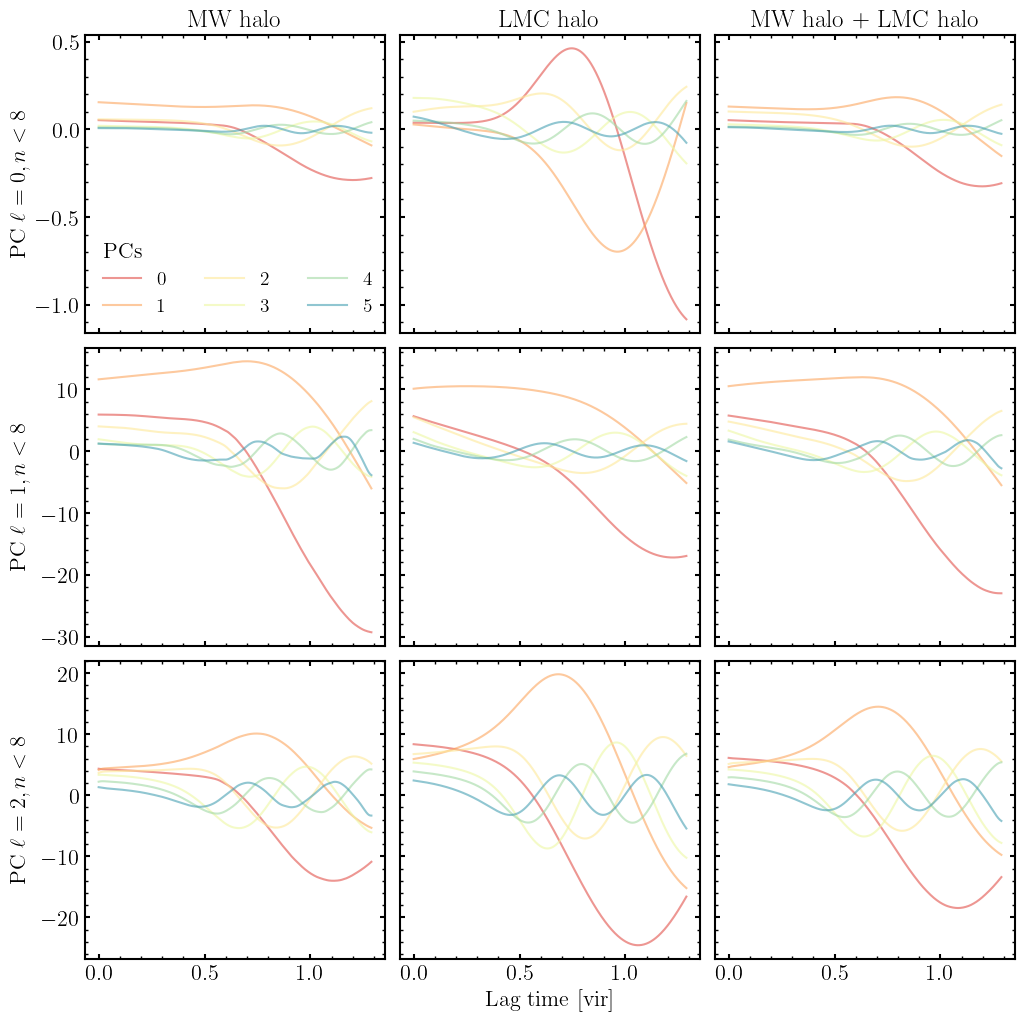

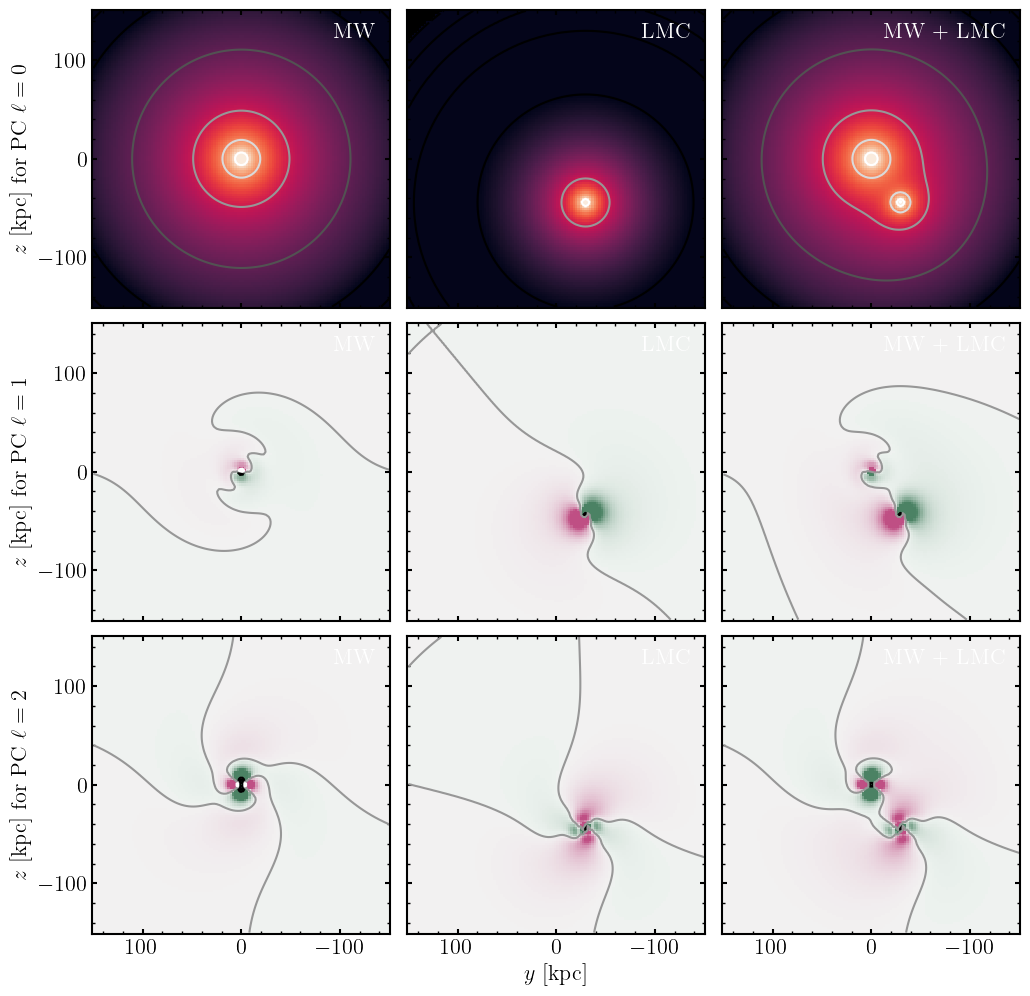

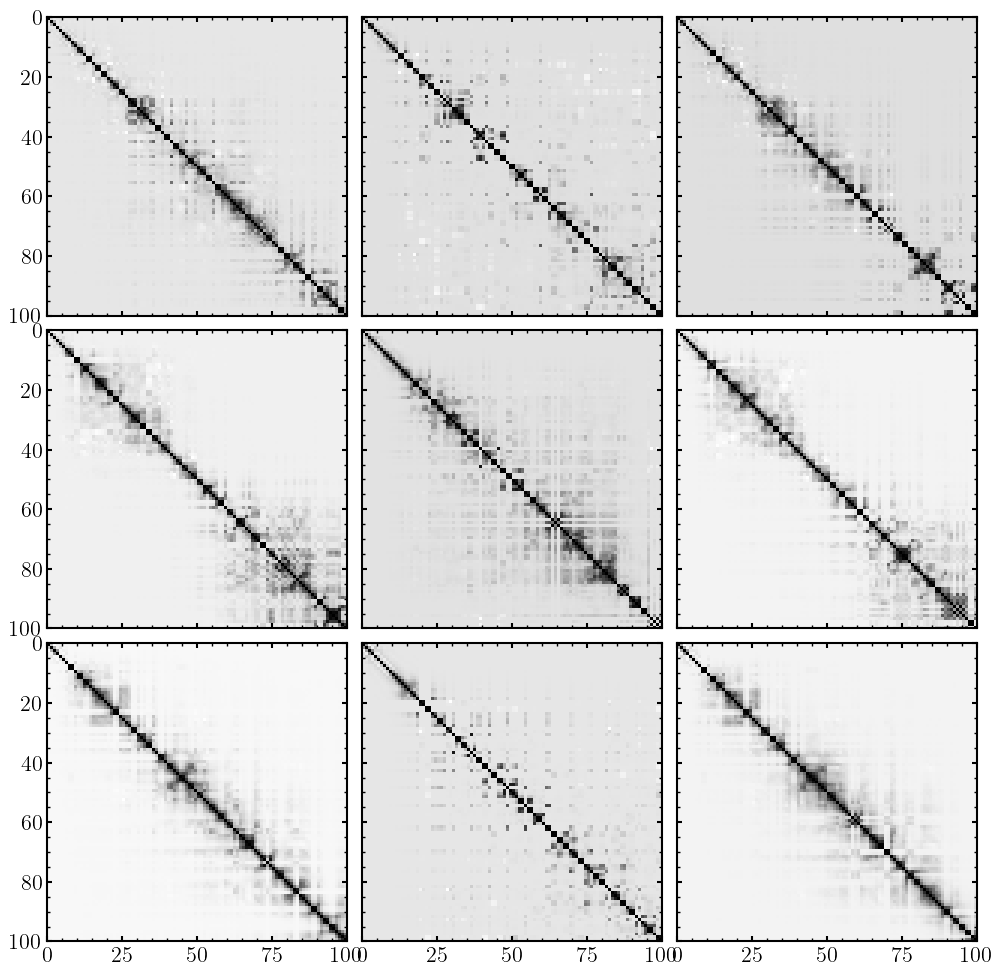

In [15]:
# more entries here: MW halo MW disc, LMC halo LMC disc; each with coeffs and keylists; made keylist MW: m=6, disc m=4; LMC to 6 in both)
max_r_order = 8

plt.ion()

flags ="""
---
totPow: true
# totVar: true
BDCSVD: true
# verbose: false
...
"""

window = int(len(mwhalo_coefs.Times())/2)
npc = 100 # number of principal components; probably want more than 20; max number of PCs would be the window length
orders = [[0], [1], [2]] # figure this out later, [0,1], [0,2], [1,2], [0,1,2]]

gal_combs = [['MW halo'], ['LMC halo'], ['MW halo', 'LMC halo']]

# gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
#             'LMC halo': [lmchalo_coefs, lmchbasis, lmchcenter]}


##
size = 150./virialradius
npix = 128

times_vir = mwhalo_coefs.Times()
tref_vir = 1.7008
itref = np.where(lmchcenter['t'] >= tref_vir)[0][0]
pmin  = [0.0, -size,  -size]
pmax  = [0.0, size, size]
grid  = [ 0,  npix,  npix]

## set up figures
fig, ax = plt.subplots(len(orders), len(gal_combs), figsize=(12, 12), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
fig2, ax2 = plt.subplots(len(orders), len(gal_combs), figsize=(12, 12), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
fig3, ax3 = plt.subplots(len(orders), len(gal_combs), figsize=(12, 12), sharex=True, sharey='row', gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

cmap = sns.color_palette("rocket", as_cmap=True)
N = cmap.N
cmap.set_under(cmap(1))
cmap.set_over(cmap(N-1))
densmin = 1e5
densmax = 1
vmin={orders[0][0]: 1e3, orders[1][0]: -1e5, orders[2][0]: -1e5} # minima near orders[1][0]: -1e6, orders[2][0]: -5e6
vmax={orders[0][0]: 1e7, orders[1][0]: 1e5, orders[2][0]: 1e5} # maxima near  orders[1][0]: 1e7, orders[2][0]: 3e8
norms={
    orders[0][0]: colors.LogNorm(vmin=vmin[orders[0][0]], vmax=vmax[orders[0][0]]),
    orders[1][0]: colors.TwoSlopeNorm(vcenter=0., vmin=vmin[orders[1][0]], vmax=vmax[orders[1][0]]),
    orders[2][0]: colors.TwoSlopeNorm(vcenter=0., vmin=vmin[orders[2][0]], vmax=vmax[orders[2][0]])
}
cmaps = {
    orders[0][0]: cmap,
    orders[1][0]: sns.diverging_palette(145, 345, s=60, as_cmap=True),  
    orders[2][0]: sns.diverging_palette(145, 345, s=60, as_cmap=True)
}
levels = np.logspace(3,7,endpoint=True,num=9)


for i, order in enumerate(orders):
    for j, gals in enumerate(gal_combs):
        print(f"order: {order}") 
        mwhalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.{runtag2}')
        lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.lmchalo.{runtag2}') 
        
        gal_dict = {'MW halo': [mwhalo_coefs, mwhbasis, mwhcenter], 
                    'LMC halo': [lmchalo_coefs, lmchbasis, lmchcenter]}
        
        mwh_rad_mask = [np.where(np.array(mwhalo_coefs.makeKeys(order))[:,2]<max_r_order)]
        lmch_rad_mask = [np.where(np.array(lmchalo_coefs.makeKeys(order))[:,2]<max_r_order)]
        mwh_keys = np.array(mwhalo_coefs.makeKeys(order))[mwh_rad_mask].tolist()[0][0]
        lmch_keys= np.array(lmchalo_coefs.makeKeys(order))[lmch_rad_mask].tolist()[0][0]
        
        config = {
            "MW halo": (mwhalo_coefs, mwh_keys, []),
            "LMC halo": (lmchalo_coefs, lmch_keys, []),
                } 
        
    
        subconfig = {key: config[key] for key in gals}
        print(subconfig)
        startTime = time.time()
        ssa = pyEXP.mssa.expMSSA(subconfig, window, npc, flags)
        ev = ssa.eigenvalues() # do the decomposition (expensive step)
        pc = ssa.getPC() # also triggers the expensive step
        
        

                    
        # reconstruct here
        ssa.reconstruct([*range(npc)])
        
        corr_mat = ssa.wCorrAll()
        ax3[i,j].pcolormesh(corr_mat, cmap=plt.cm.Greys)
        ax3[i,j].set_ylim(npc,0)
        if np.sum(corr_mat) == npc:
            print("All diagonal elements are 1.")
        else:
            print(f"In {order} for {gals}, there are off-diagonal elements.")
    

        ax[i,0].set_ylabel(rf'PC $\ell={order[0]}, n<{max_r_order}$')
        
        ax2[i,0].set_ylabel(rf'$z$ [kpc] for PC $\ell={order[0]}$')

        rows, cols = pc.shape
        for k in range(min(cols,6)):
            if pc[0,k] < 0:
                sgn = -1
            else:
                sgn = 1
            ax[i, j].plot(times_vir[0:rows], sgn*pc[:,k], '-', label="{:d}".format(k), alpha=0.6)



        if False:
            subconfig2 = {key: full_config[key] for key in gals}
            startTime = time.time()
            ssa = pyEXP.mssa.expMSSA(subconfig2, window, npc, flags)
            ev = ssa.eigenvalues() # do the decomposition (expensive step)
            pc = ssa.getPC() # also triggers the expensive step
            print(f'Computed l={order},n=20 eigenvalues and PCs for {gals} in {time.time() - startTime:6.2f} seconds.')

            rows, cols = pc.shape
            for k in range(min(cols,6)):
                if pc[0,k] < 0:
                    sgn = -1
                else:
                    sgn = 1
                full_lines = ax[i, j].plot(times[0:rows], sgn*pc[:,k], '--', alpha=0.6)

        # Loop over galaxies
        title = ""
        
        for l, gal in enumerate(gals):
            print(order, l, gal)

            
            coefs, basis, center = gal_dict[gal]
            coefs.zerodata() 
            reconstruct = ssa.getReconstructed()[gal]
            
            print(coefs.Power())

            title += f'{gal.split(' ')[0]}'
            if len(gals)>1 and l == 0:
                title += ' + '


            fields = pyEXP.field.FieldGenerator([tref_vir], pmin, pmax, grid)    
            surfaces = fields.slices(basis, reconstruct)
            
            # make lmc field if necessary, needs to be shifted by LMC center
            if gal == 'LMC halo':
                
                center_tmp = np.array([center['x'][itref], center['y'][itref], center['z'][itref]])
                pmin_tmp  = [0.0, float(-size-center_tmp[1]),  float(-size-center_tmp[2])]
                pmax_tmp  = [0.0, float(size-center_tmp[1]), float(size-center_tmp[2])]
                # print(center_tmp*virialradius)
                fields = pyEXP.field.FieldGenerator([tref_vir], pmin_tmp, pmax_tmp, grid)
                surfaces = fields.slices(basis, reconstruct)

            keys = list(surfaces.keys())

            if l == 0:
                print('l=0')
                nx = surfaces[keys[0]]['dens'].shape[0]
                ny = surfaces[keys[0]]['dens'].shape[1]            
                # Make the mesh
                x = np.linspace(pmin[1], pmax[1], nx)
                y = np.linspace(pmin[2], pmax[2], ny)
                xv, yv = np.meshgrid(x, y)    
                mat = surfaces[tref_vir]['dens'] * massscale / pow(virialradius,3)
                
            else:
                mat += surfaces[tref_vir]['dens'] * massscale / pow(virialradius,3)
                
            
        print(np.min(mat), np.max(mat))
        cont1 = ax2[i, j].contour(xv*virialradius, yv*virialradius, 
                                mat.transpose(), 
                                norm=norms[order[0]],
                                cmap=plt.cm.Greys_r, 
                                )
        cont2 = ax2[i, j].pcolormesh(xv*virialradius, yv*virialradius, 
                                    mat.transpose(),
                                    norm=norms[order[0]],
                                    cmap=cmaps[order[0]],
                                    )

        ax2[i, j].text(0.95, 0.925, title, horizontalalignment='right', 
                 verticalalignment='center', transform=ax2[i,j].transAxes, c= 'white', fontsize = 16)

    
        ax2[i, j].invert_xaxis()
        ax2[i, j].set_aspect('equal')
        ax2[i, j].set_facecolor('k')
        
    # break

ax[0,0].legend(ncols=3, fontsize=14, frameon=False, title='PCs', alignment='left')

ax[-1,1].set_xlabel('Lag time [vir]')

ax[0,0].set_title("MW halo")
ax[0,1].set_title("LMC halo")
ax[0,2].set_title("MW halo + LMC halo")

fig.align_ylabels()

# # same for ax2
ax2[-1,1].set_xlabel('$y$ [kpc]')
# ax2[0,0].set_title("MW halo")
# ax2[0,1].set_title("LMC halo")
# ax2[0,2].set_title("MW halo + LMC halo")
fig2.align_ylabels()



plt.show()


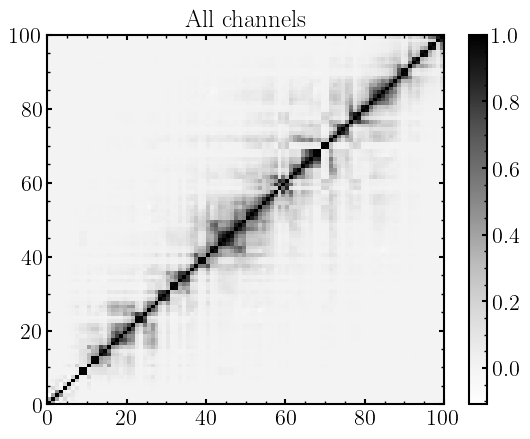

In [16]:
x = plt.pcolormesh(corr_mat, cmap=plt.cm.Greys)
plt.title("All channels")
plt.colorbar(x)
plt.show()

In [17]:
len(corr_mat.diagonal())

100

In [18]:
ssa.getReconstructed?

Docstring:
getReconstructed(self: pyEXP.mssa.expMSSA, reconstructmean: bool = True) -> dict[str, pyEXP.coefs.Coefs]


provide reconstructed time series

Parameters
----------
reconstructmean : bool, default=True
     include the detrended mean in the data channel reconstruction

Returns
-------
dict({id: Coefs},...)
     reconstructed time series in the original coefficient form

Notes
-----
The reconstructed data will overwrite the memory of the original coefficient 
data.  We suggest a deepcopy() if you wish to preserve the input coefficient db.

Setting 'reconstructmean=False' may be helpful to compare the variance between 
data channels.
Type:      method

In [19]:
coefs.Power()

array([[0.00000000e+00, 0.00000000e+00, 5.00285204e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00286317e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.35125568e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.37646188e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.37526480e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.36379464e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [20]:
itref = np.where(lmchcenter['t'] >= tref_vir)[0][0]

In [21]:
lmchcenter['z'][itref]*virialradius

-44.27563

In [22]:
# # make some reconstructions as it does not seem to be working in the for loop in the cell above
# # try MW LMC l=0 reconstructions
# order = [0]
# rad_mask = [np.where(np.array(mwhalo_coefs.makeKeys(order))[:,2]<max_r_order)]
# mwh_subcoefs = np.array(mwhalo_coefs.makeKeys(order))[rad_mask].tolist()[0][0]
# lmch_subcoefs = np.array(lmchalo_coefs.makeKeys(order))[rad_mask].tolist()[0][0]
# config = {
#     "MW halo": (mwhalo_coefs, mwh_subcoefs, []),
#     "LMC halo": (lmchalo_coefs, lmch_subcoefs, []),
#         } 
# startTime = time.time()
# ssa = pyEXP.mssa.expMSSA(config, window, npc, flags)
# ev = ssa.eigenvalues() # do the decomposition (expensive step)
# pc = ssa.getPC() # also triggers the expensive step
# print(f'\nComputed {order}, n={max_r_order} eigenvalues and PCs for {gals} in {time.time() - startTime:6.2f} seconds.')


In [23]:
ssa.getReconstructed()['LMC halo'].Power()

array([[0.00000000e+00, 0.00000000e+00, 5.00285204e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00286317e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.35125568e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.37646188e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.37526480e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.36379464e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [24]:

# # make reconstruction plot
# startTime = time.time()
# print('Calling reconstruction')
# ssa.reconstruct(order)
# print('Reconstruction took {:6.2f} seconds'.format(time.time() - startTime))


In [25]:
# surfaces = fields.slices(mwhbasis, newdata['MW halo'])
# 

In [26]:
# ssa.reconstruct([0])

In [27]:
# ssa.getReconstructed()['LMC/ halo'] 

In [28]:
# %%
# print("Window={} PC number={}".format(window, npc))



In [29]:
# ev = ssa.eigenvalues() # do the decomposition (expensive step)
# print('Computed eigenvalues in {:6.2f} seconds'.format(time.time() - startTime))

In [30]:
# startTime2 = time.time()
# pc = ssa.getPC() # also triggers the expensive step
# print('Computed PCs in {:6.2f} seconds'.format(time.time() - startTime2))

In [31]:
# look at EVs
# plt.plot(ev, '.-')
# plt.xlabel("Index")
# plt.ylabel("EV")
# plt.title("Eigenvalues by index")
# # plt.xlim(0, 40) 
# plt.show()

In [32]:
# look at PCs


# times = mwhalo_coefs.Times()


# rows, cols = pc.shape



# for i in range(min(cols,6)):
#     plt.plot(times[0:rows], pc[:,i], '-', label="{:d}".format(i))

# plt.xlabel('Time')
# plt.ylabel('PC')
# plt.legend(ncols=2, fontsize=12, frameon=False)
# plt.title("Principal components (left-singular vectors)")
# plt.show()

In [33]:
# ssa.getAllKeys()

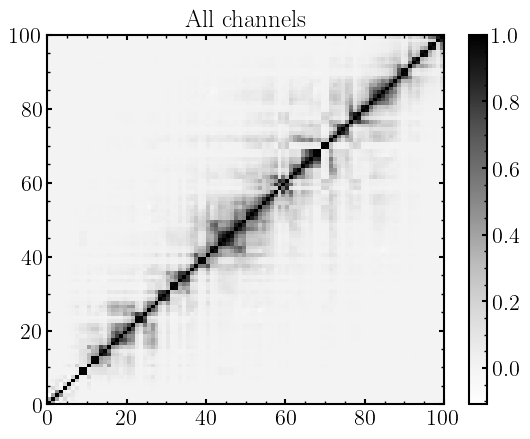

In [34]:
# # plot the correlation matrix
mat = ssa.wCorrAll()
x = plt.pcolormesh(mat, cmap=plt.cm.Greys)
plt.title("All channels")
plt.colorbar(x)
plt.show()

In [35]:
# file = f'{datadir_mssa}/G5/traj_LMCH'
# print('File={}'.format(file))
# if os.path.exists(file+"_mssa.h5"):
#     print('Restore file={}'.format(file))
#     # ssa.restoreState(file)
#     # totPow = ssa.getTotPow()
#     # ev = ssa.eigenvalues()
#     # cum = ssa.cumulative()
# else:
#     print('not found')

In [36]:
# ssa.reconstruct([0,2])
# 

In [37]:
# totPow = ssa.getTotPow()

In [38]:
# cum = ssa.cumulative()
# cum

In [39]:
ev.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

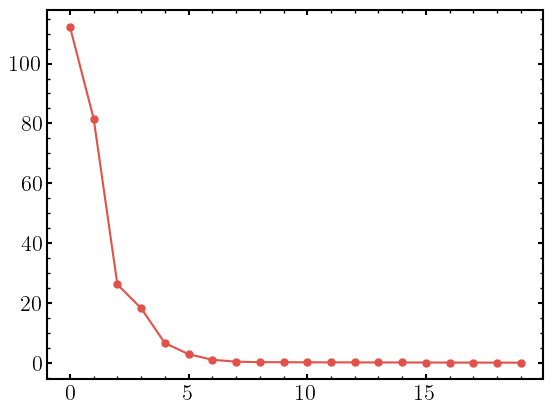

In [ ]:
plt.plot(ev[:20], '.-')
